## Metacritic and ROI Analysis



In [1]:
%matplotlib inline

import configparser
import os

import requests
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
from sklearn import preprocessing, decomposition
import librosa
import IPython.display as ipd
import json

#added by me:
import requests
from pygsp import graphs, filters, plotting
plt.rcParams['figure.figsize'] = (17, 5)
plotting.BACKEND = 'matplotlib'

2018-01-22 21:26:18,802:[WARNING](pygsp.graphs.nngraphs.nngraph.<module>): Cannot import pyflann (used for faster kNN computations): Traceback (most recent call last):
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pygsp\graphs\nngraphs\nngraph.py", line 14, in <module>
    import pyflann as pfl
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\__init__.py", line 27, in <module>
    from pyflann.index import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\index.py", line 27, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\bindings\__init__.py", line 30, in <module>
    from pyflann.bindings.flann_ctypes import *
  File "C:\Users\Valentin\Anaconda3\lib\site-packages\pyflann\bindings\flann_ctypes.py", line 171, in <module>
    raise ImportError('Cannot load dynamic library. Did you compile FLANN?')
ImportError: Cannot load dynamic library. Did you compile FLANN?



In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6);

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plotting']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Load Dataset ###

In [2]:
df = pd.read_csv('Saved_Datasets/NewFeaturesDataset.csv')

In [4]:
#df = df[df['Metacritic'] != 0]

In [4]:
df.head()

,id,budget,genres,imdb_id,overview,production_companies,release_date,revenue,tagline,title,director_name,director_id,actor_names,actor_ids,Metacritic,Normed_Metacritic,ROI,Normed_ROI,success
0,12,94000000,Animation|Family,266543,"Nemo, an adventurous young clownfish, is unexp...",Pixar Animation Studios,2003-05-30,940335536,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,Andrew Stanton,0,"['Albert Brooks', 'Ellen DeGeneres', 'Alexande...","[0, 908, 2000, 772, 3304]",90,0.943,9.003570,0.47,1
1,16,12800000,Drama|Crime|Music,168629,"Selma, a Czech immigrant on the verge of blind...",Fine Line Features,2000-05-17,40031879,You don't need eyes to see.,Dancer in the Dark,Lars von Trier,1,"['Björk', 'Catherine Deneuve', 'David Morse', ...","[1, 434, 2001, 1630, 3993]",61,0.731,2.127491,0.14,1
2,22,140000000,Adventure|Fantasy|Action,325980,"Jack Sparrow, a freewheeling 17th-century pira...",Walt Disney Pictures,2003-09-07,655011224,Prepare to be blown out of the water.,Pirates of the Caribbean: The Curse of the Bla...,Gore Verbinski,2,"['Johnny Depp', 'Geoffrey Rush', 'Orlando Bloo...","[2, 412, 136, 71, 3143]",63,0.754,3.678652,0.23,1
3,24,30000000,Action|Crime,266697,An assassin is shot at the altar by her ruthle...,Miramax Films,2003-10-10,180949000,Go for the kill.,Kill Bill: Vol. 1,Quentin Tarantino,3,"['Uma Thurman', 'Lucy Liu', 'Vivica A. Fox', '...","[3, 1071, 2002, 1684, 1097]",69,0.814,5.031633,0.30,1
4,25,72000000,Drama|War,418763,Jarhead is a film about a US Marine Anthony Sw...,Universal Pictures,2005-04-11,96889998,Welcome to the suck.,Jarhead,Sam Mendes,4,"['Jamie Foxx', 'Scott MacDonald', 'Lucas Black...","[4, 1072, 328, 1293]",58,0.695,0.345694,0.02,1


### Metacritic Ratings Representation

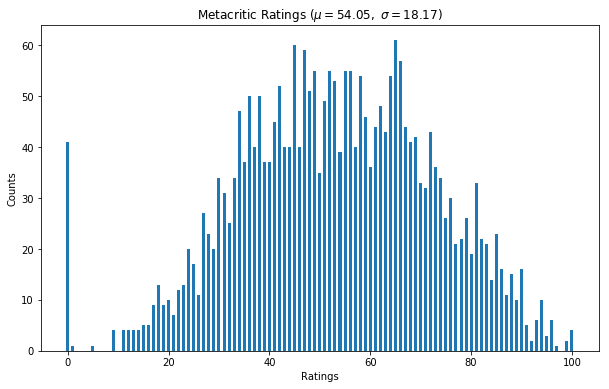

In [23]:
unique, counts = np.unique(df['Metacritic'], return_counts=True)
plt.bar(unique,counts,align='center',width=.6);

ratings_nz = np.array(df[df['Metacritic'] != 0]['Metacritic'])
mu = np.mean(ratings_nz)
std = np.std(ratings_nz)

plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title("Metacritic Ratings ($ \mu=%.2f,$ $\sigma=%.2f $)" %(mu,std));

plt.savefig('images/Metacritic_distribution.png')

### ROI Representation

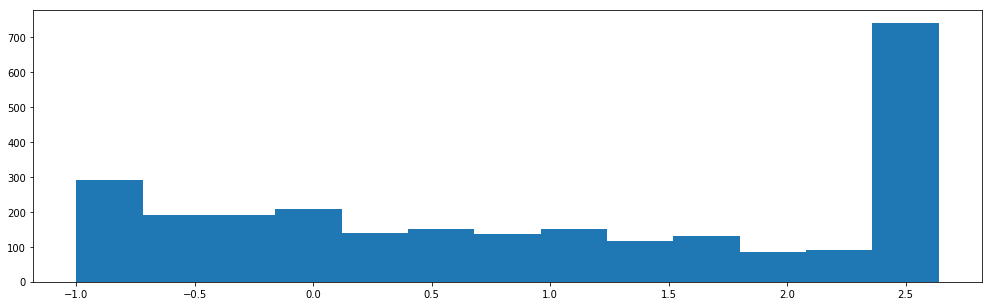

In [3]:
plt.hist(df['ROI'],bins='auto');

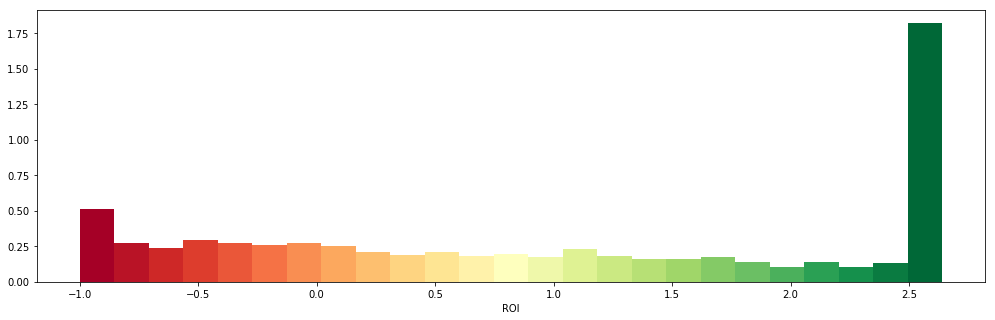

In [16]:
data = np.array(df['ROI'])

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlGn');

# Plot histogram.
n, bins, patches = plt.hist(data, 25, normed=1, color='yellow');
bin_centers = 0.5 * (bins[:-1] + bins[1:]);

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c));

    
plt.xlabel('ROI');
plt.savefig('images/ROI_regression.png');
plt.show();

In [4]:
np.percentile(df['ROI'], 75)

2.6390099166666667

### Save Dataset

In [39]:
df.to_csv('Saved_Datasets/NewFeaturesDataset.csv', encoding='utf-8', index=False)

### Metacritic VS. ROI

In [13]:
print("%.2f" % (len(df[df['ROI']>1])/len(df)*100))
print("%.2f" % (len(df[df['Metacritic']>50])/len(df)*100))

49.26
55.63


We can see that the ROI and the ratings are not correlated as the ROI doesn't necessarily increases for good movies :

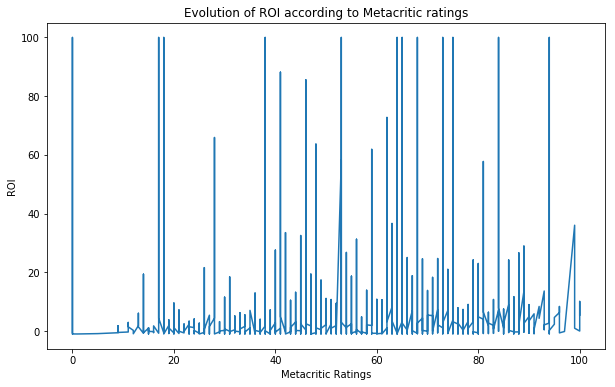

In [24]:
df_sorted = df.sort_values(by=['Metacritic'])
plt.plot(df_sorted['Metacritic'],df_sorted['ROI'])
plt.xlabel('Metacritic Ratings')
plt.ylabel('ROI')
plt.title('Evolution of ROI according to Metacritic ratings');

plt.savefig('images/roi_vs_metacritic.png')

### How to determine the success of a movie ?

Try: consider that the 30% of the movies with the highest ROI are the successful movies.

To determine an optimal ratio to use, try to find a high enough ratio which leads to a maximum metacritic mean:

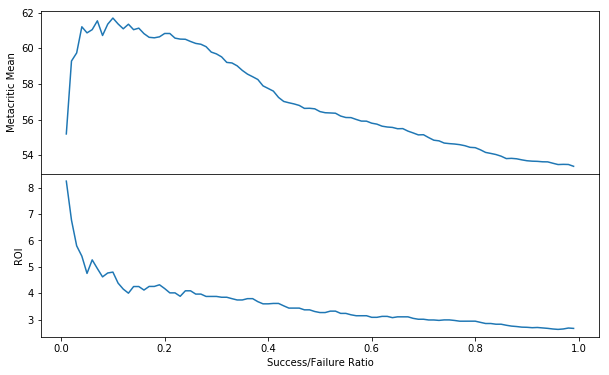

In [15]:
df_roi_sorted = df.sort_values(by=['ROI'],ascending=False)
df_met_sorted = df.sort_values(by=['Metacritic'],ascending=False)
mean_roi, mean_met = [], []

for r in np.arange(0.01, 1.0, 0.01):
    limit_roi = df_roi_sorted.iloc[int(len(df)*r)]['ROI']
    limit_met = df_met_sorted.iloc[int(len(df)*r)]['Metacritic']
    success_roi = df[df['ROI'] > limit_roi]
    success_met = df[df['Metacritic'] > limit_met]
    mean_roi.append([r,np.mean(success_roi['Metacritic'])])
    mean_met.append([r,np.mean(success_met['ROI'])])

mean_roi = np.array(mean_roi)
mean_met = np.array(mean_met)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(mean_roi[:,0],mean_roi[:,1]);
axarr[0].set_ylabel('Metacritic Mean')

axarr[1].plot(mean_met[:,0],mean_met[:,1]);
axarr[1].set_xlabel('Success/Failure Ratio')
axarr[1].set_ylabel('ROI')

f.subplots_adjust(hspace=0);
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False);

In [16]:
ratio = 0.2

df_sorted = df.sort_values(by=['ROI'],ascending=False)
limit_roi = df_sorted.iloc[int(len(df)*ratio)]['ROI']
success = df[df['ROI'] > limit_roi]
failure = df[df['ROI'] <= limit_roi]
print("The ROI needed to be a successful movie is: "+str(limit_roi)[:4])
print("There are "+str(int(len(df)*ratio))+" successful movies in the dataset.")

The ROI needed to be a successful movie is: 3.26
There are 524 successful movies in the dataset.


### Create Normalized Metacritic Weight Matrix

$$ W(i,j) = \begin{cases}
0 & \text{if } Metacritic_{normed}(i,j) = 0\\
1-\frac{abs(Metacritic(i) - Metacritic(j))}{100} & \text{otherwise} \end{cases}$$

In [17]:
df = pd.read_csv('Saved_Datasets/NewFeaturesDataset.csv')

In [50]:
df = df.drop(df[df.Metacritic == 0].index)

In [30]:
crit_norm = np.array(df['Metacritic'])

w = np.zeros((len(df),len(df)))

for i in range(0,len(df)):
    for j in range(i,len(df)):
        if (i == j):
            w[i,j] = 0
            continue
        if (crit_norm[i] == 0 or crit_norm[j] == 0):
            w[i,j] = w[j,i] = 0
        else:
            w[i,j] = w[j,i] = 1.0 - (abs(crit_norm[i]-crit_norm[j])/100)

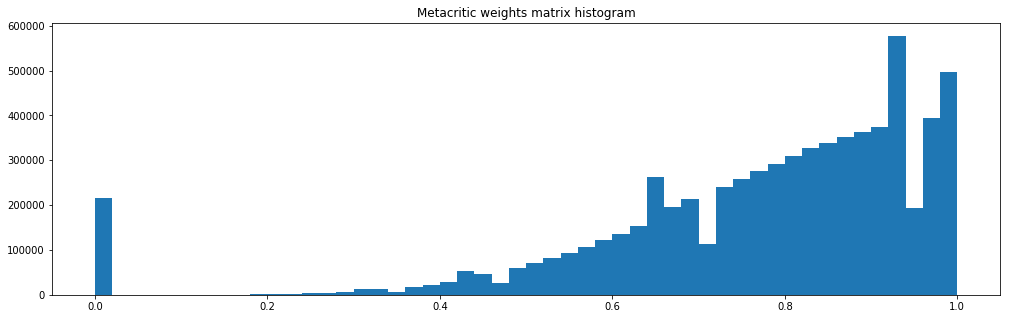

In [31]:
plt.hist(w.reshape(-1), bins=50);

plt.title('Metacritic weights matrix histogram')

plt.savefig('images/metacritic_weights_hist.png')

In [32]:
print('The mean value is: {}'.format(w.mean()))
print('The max value is: {}'.format(w.max()))
print('The min value is: {}'.format(w.min()))

The mean value is: 0.7674232758305705
The max value is: 1.0
The min value is: 0.0


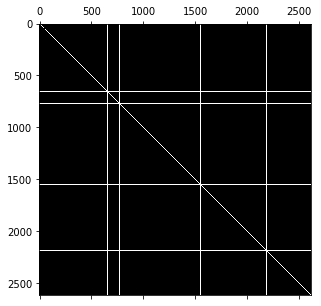

In [33]:
plt.spy(w)

Save as csv

In [34]:
W = pd.DataFrame(w)
W.head()

,0,1,2,3,4,5,6,7,8,9,...,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620
0,0.00,0.71,0.73,0.79,0.68,0.53,0.90,0.99,0.63,0.91,...,0.52,0.37,0.79,0.89,0.73,0.64,0.41,0.81,0.75,0.83
1,0.71,0.00,0.98,0.92,0.97,0.82,0.81,0.72,0.92,0.80,...,0.81,0.66,0.92,0.82,0.98,0.93,0.70,0.90,0.96,0.88
2,0.73,0.98,0.00,0.94,0.95,0.80,0.83,0.74,0.90,0.82,...,0.79,0.64,0.94,0.84,1.00,0.91,0.68,0.92,0.98,0.90
3,0.79,0.92,0.94,0.00,0.89,0.74,0.89,0.80,0.84,0.88,...,0.73,0.58,1.00,0.90,0.94,0.85,0.62,0.98,0.96,0.96
4,0.68,0.97,0.95,0.89,0.00,0.85,0.78,0.69,0.95,0.77,...,0.84,0.69,0.89,0.79,0.95,0.96,0.73,0.87,0.93,0.85


In [35]:
W.to_csv('Saved_Datasets/NormalizedMetacriticW.csv', encoding='utf-8', index=False)

### Embedding

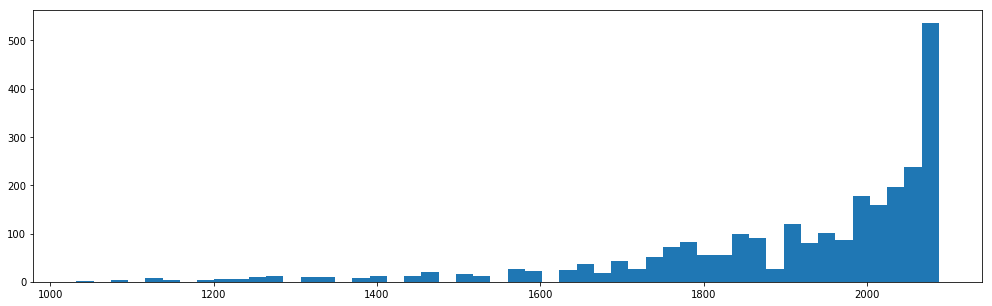

In [10]:
degrees = np.zeros(len(w)) 

#reminder: the degrees of a node for a weighted graph are the sum of its weights

for i in range(0, len(w)):
    degrees[i] = sum(w[i])

plt.hist(degrees, bins=50);

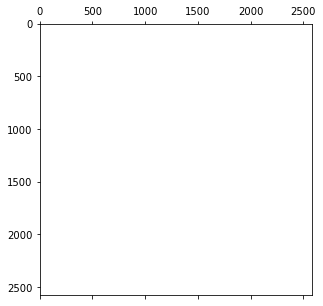

In [11]:
#reminder: L = D - W for weighted graphs
laplacian = np.diag(degrees) - w

#computation of the normalized Laplacian
laplacian_norm = scipy.sparse.csgraph.laplacian(w, normed = True)

plt.spy(laplacian_norm);

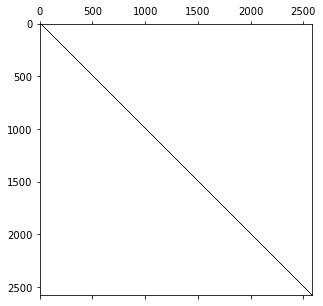

In [12]:
plt.spy(np.diag(degrees))

In [13]:
NEIGHBORS = 300

#sort the order of the weights
sort_order = np.argsort(w, axis = 1)

#declaration of a sorted weight matrix
sorted_weights = np.zeros((len(w), len(w)))

for i in range (0, len(w)):  
    for j in range(0, len(w)):
        if (j >= len(w) - NEIGHBORS):
            #copy the k strongest edges for each node
            sorted_weights[i, sort_order[i,j]] = w[i,sort_order[i,j]]
        else:
            #set the other edges to zero
            sorted_weights[i, sort_order[i,j]] = 0

#ensure the matrix is symmetric
bigger = sorted_weights.transpose() > sorted_weights
sorted_weights = sorted_weights - sorted_weights*bigger + sorted_weights.transpose()*bigger

np.fill_diagonal(sorted_weights, 0)

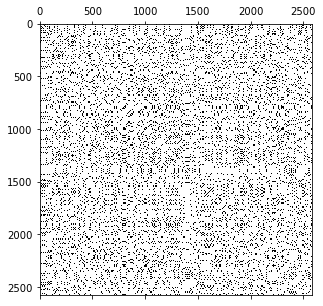

In [14]:
plt.spy(sorted_weights)

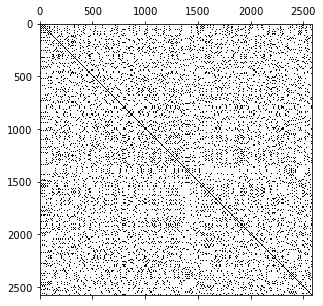

In [15]:
#reminder: L = D - W for weighted graphs
laplacian = np.diag(degrees) - sorted_weights

#computation of the normalized Laplacian
laplacian_norm = scipy.sparse.csgraph.laplacian(sorted_weights, normed = True)
np.fill_diagonal(laplacian_norm, 1)


plt.spy(laplacian_norm);

In [16]:
laplacian_norm = sparse.csr_matrix(laplacian_norm)

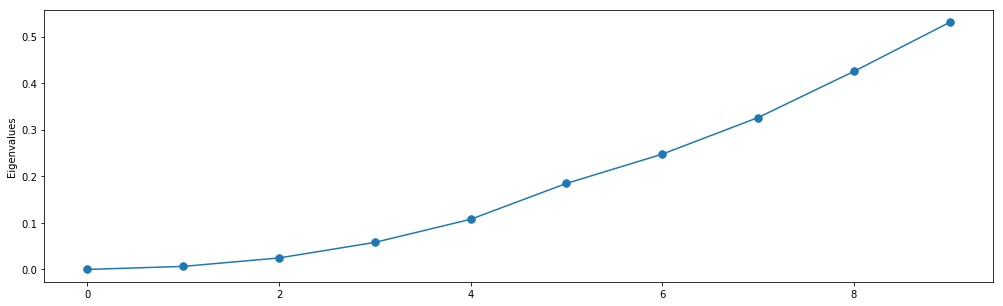

[1 1 1 ..., 1 1 0]


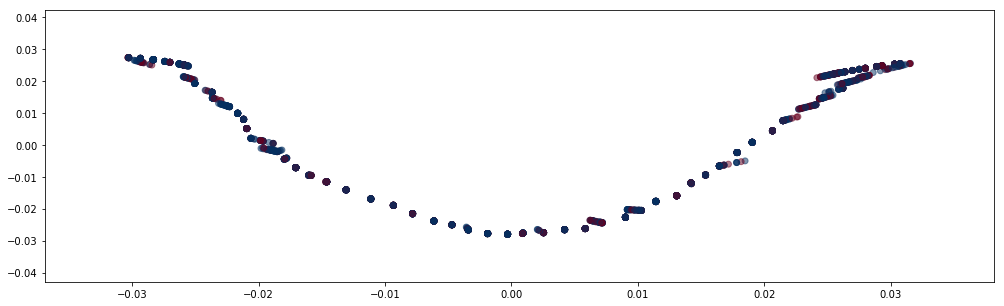

In [17]:
eigenvalues, eigenvectors =  sparse.linalg.eigsh(laplacian_norm, k = 10, which = 'SM') 

plt.plot(eigenvalues, '.-', markersize=15);
plt.xlabel('')
plt.ylabel('Eigenvalues')
plt.show()

success = preprocessing.LabelEncoder().fit_transform(df['success'])
print(success)

x = eigenvectors[:, 1] 
y = eigenvectors[:, 2] 
plt.scatter(x, y, c=success, cmap='RdBu', alpha=0.5);

In [18]:
G = graphs.Graph(sorted_weights)
G.compute_laplacian('normalized')

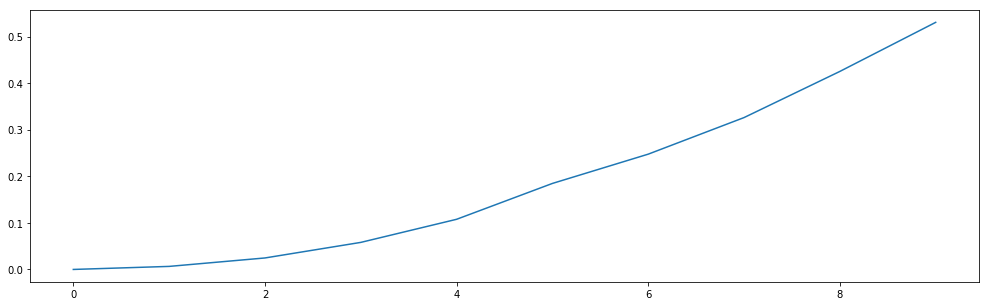

In [19]:
G.compute_fourier_basis(recompute=True)
plt.plot(G.e[0:10]);

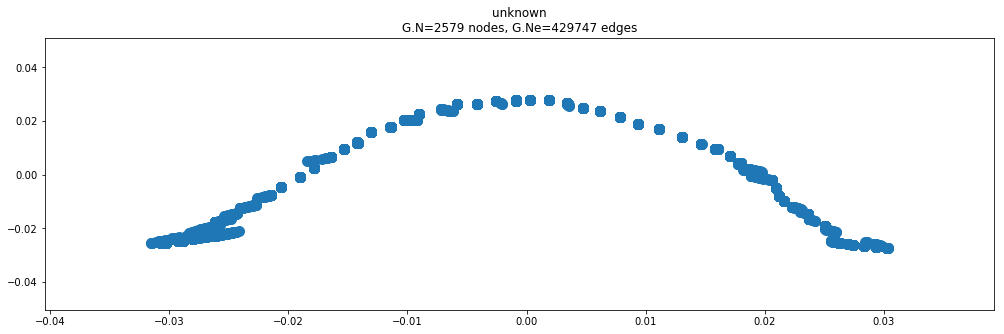

In [20]:
G.set_coordinates(G.U[:,1:3])
G.plot()

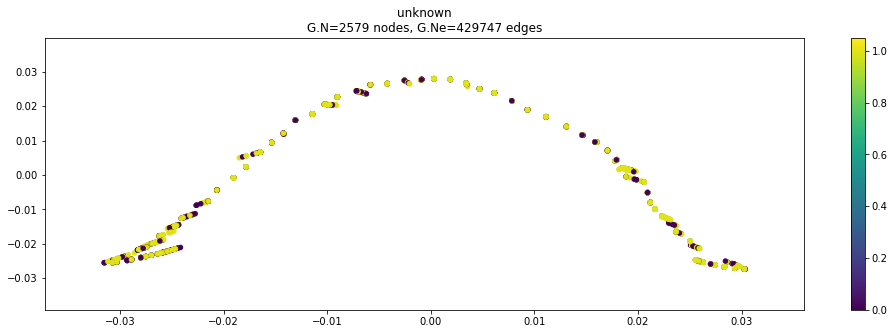

In [21]:
G.plot_signal(success, vertex_size=20)